## Project Definition

### Objective
The primary aim of this project is to conduct a detailed analysis of violent crime trends in Anne Arundel and Montgomery Counties in Maryland, specifically focusing on the relationship between crime rates and population changes over the period from 1975 to 2016. This project will introduce a novel metric that not only considers the annual crime rates per 100,000 people but also adjusts these rates relative to population changes since the beginning of the observation period. This metric will provide a more nuanced understanding of crime dynamics in these counties, taking into account how demographic shifts could influence crime trends.

### Key Questions
- How have the per capita violent crime rates in Anne Arundel and Montgomery Counties evolved from 1975 to 2016?
- What is the relationship between population changes and violent crime rates in these counties over the specified period?
- Can we develop an adjusted crime rate metric that reflects changes in crime rates, accounting for population growth or decline since 1975, and how does this new perspective alter our understanding of crime trends in these areas?

### Significance
This investigation is aimed at uncovering deeper insights into the long-term trends of violent crime in Anne Arundel and Montgomery Counties, with the potential to inform public policy, guide community safety strategies, and stimulate further academic inquiry into the socio-economic and demographic factors that influence crime rates.


**Data Source Citation:**

2021). *Violent Crime by Counties in Maryland (1975-2016)* [Data set]. Kaggle. https://www.kaggle.com/datasets/kingabzpro/violent-crime-by-countries/data


**Data Source Description:**

This dataset encompasses recorded instances of violent crime across various counties in Maryland from the years 1975 to 2016. It includes detailed crime statistics per county, categorized into different types of violent crimes such as murder, rape, robbery, and aggravated assault. The dataset was compiled to facilitate an in-depth analysis of crime trends over this period, potentially aiding in sociological studies, law enforcement resource allocation, and public policy formulation. The data were sourced from official law enforcement agency reports submitted to the Federal Bureau of Investigation's Uniform Crime Reporting (UCR) Program, ensuring a high level of accuracy and reliability.


**Data Description:**

- **Number of Rows (Samples)**: The dataset contains a total of 1008 entries, each representing annual crime statistics for a specific county.
- **Number of Columns (Features)**: There are 39 columns in the dataset, detailing the jurisdiction, year, population, specific crime counts (like murder, rape, etc.), and various crime rates per 100,000 people, among others.
- **Data Types**: The dataset primarily consists of numerical data (integers and floats) for crime counts and rates, with categorical data for the jurisdiction (county names) and temporal data for the year.
- **Key Features**: Some of the critical columns include 'JURISDICTION' for the county name, 'YEAR' for the year of the record, 'POPULATION' for the county's population that year, and 'VIOLENT CRIME RATE PER 100,000 PEOPLE' for the standardized violent crime metric. Additionally, there are breakdowns of specific crime types and their respective rates per 100,000 people.
- **Data Source**: The data is a single-table dataset, compiled into a comprehensive CSV file, without the need for joining multiple tables or sources.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

# Ensure plots are displayed inline in the Jupyter Notebook
%matplotlib inline


In [44]:
# Load the dataset
df = pd.read_csv('Downloads/archive/Violent_Crime_by_County_1975_to_2016.csv')

# Display the first few rows of the dataframe
print(df.head())

# Get a concise summary of the dataframe
print(df.info())



      JURISDICTION                    YEAR  POPULATION  MURDER  RAPE  ROBBERY  \
0  Allegany County  01/01/1975 12:00:00 AM       79655       3     5       20   
1  Allegany County  01/01/1976 12:00:00 AM       83923       2     2       24   
2  Allegany County  01/01/1977 12:00:00 AM       82102       3     7       32   
3  Allegany County  01/01/1978 12:00:00 AM       79966       1     2       18   
4  Allegany County  01/01/1979 12:00:00 AM       79721       1     7       18   

   AGG. ASSAULT  B & E  LARCENY THEFT  M/V THEFT  ...  \
0           114    669           1425         93  ...   
1            59    581           1384         73  ...   
2            85    592           1390        102  ...   
3            81    539           1390        100  ...   
4            84    502           1611         99  ...   

   B & E PER 100,000 PEOPLE  LARCENY THEFT PER 100,000 PEOPLE  \
0                     839.9                            1789.0   
1                     692.3             

In [7]:
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1008 rows and 38 columns


In [8]:
print(df.columns) 

Index(['JURISDICTION', 'YEAR', 'POPULATION', 'MURDER', 'RAPE', 'ROBBERY',
       'AGG. ASSAULT', 'B & E', 'LARCENY THEFT', 'M/V THEFT', 'GRAND TOTAL',
       'PERCENT CHANGE', 'VIOLENT CRIME TOTAL', 'VIOLENT CRIME PERCENT',
       'VIOLENT CRIME PERCENT CHANGE', 'PROPERTY CRIME TOTALS',
       'PROPERTY CRIME PERCENT', 'PROPERTY CRIME PERCENT CHANGE',
       'OVERALL CRIME RATE PER 100,000 PEOPLE',
       'OVERALL PERCENT CHANGE PER 100,000 PEOPLE',
       'VIOLENT CRIME RATE PER 100,000 PEOPLE',
       'VIOLENT CRIME RATE PERCENT CHANGE PER 100,000 PEOPLE',
       'PROPERTY CRIME RATE PER 100,000 PEOPLE',
       'PROPERTY CRIME RATE PERCENT CHANGE PER 100,000 PEOPLE',
       'MURDER PER 100,000 PEOPLE', 'RAPE PER 100,000 PEOPLE',
       'ROBBERY PER 100,000 PEOPLE', 'AGG. ASSAULT PER 100,000 PEOPLE',
       'B & E PER 100,000 PEOPLE', 'LARCENY THEFT PER 100,000 PEOPLE',
       'M/V THEFT PER 100,000 PEOPLE',
       'MURDER  RATE PERCENT CHANGE PER 100,000 PEOPLE',
       'RAPE RATE PE

## Data Cleaning

In [45]:
# List of columns to drop
columns_to_drop = ['MURDER', 'RAPE', 'ROBBERY', 'AGG. ASSAULT', 'B & E', 'LARCENY THEFT', 'M/V THEFT', 'GRAND TOTAL',
                   'PERCENT CHANGE', 'PROPERTY CRIME TOTALS', 'PROPERTY CRIME PERCENT', 'PROPERTY CRIME PERCENT CHANGE', 'PROPERTY CRIME RATE PER 100,000 PEOPLE', 'PROPERTY CRIME RATE PERCENT CHANGE PER 100,000 PEOPLE',
                   'MURDER PER 100,000 PEOPLE', 'RAPE PER 100,000 PEOPLE', 'ROBBERY PER 100,000 PEOPLE',
                   'AGG. ASSAULT PER 100,000 PEOPLE', 'B & E PER 100,000 PEOPLE', 'LARCENY THEFT PER 100,000 PEOPLE',
                   'M/V THEFT PER 100,000 PEOPLE', 'MURDER  RATE PERCENT CHANGE PER 100,000 PEOPLE', 
                   'RAPE RATE PERCENT CHANGE PER 100,000 PEOPLE', 'ROBBERY RATE PERCENT CHANGE PER 100,000 PEOPLE', 
                   'AGG. ASSAULT  RATE PERCENT CHANGE PER 100,000 PEOPLE', 'B & E RATE PERCENT CHANGE PER 100,000 PEOPLE',
                   'LARCENY THEFT  RATE PERCENT CHANGE PER 100,000 PEOPLE', 'M/V THEFT  RATE PERCENT CHANGE PER 100,000 PEOPLE']

# Drop the columns
df = df.drop(columns=columns_to_drop)

# Verify the dropped columns
print(df.columns)


Index(['JURISDICTION', 'YEAR', 'POPULATION', 'VIOLENT CRIME TOTAL',
       'VIOLENT CRIME PERCENT', 'VIOLENT CRIME PERCENT CHANGE',
       'OVERALL CRIME RATE PER 100,000 PEOPLE',
       'OVERALL PERCENT CHANGE PER 100,000 PEOPLE',
       'VIOLENT CRIME RATE PER 100,000 PEOPLE',
       'VIOLENT CRIME RATE PERCENT CHANGE PER 100,000 PEOPLE'],
      dtype='object')


In [46]:
# Remove leading and trailing spaces from the 'JURISDICTION' column
df['JURISDICTION'] = df['JURISDICTION'].str.strip()

# Verify the cleanup by checking unique values again
print(df['JURISDICTION'].unique())


['Allegany County' 'Anne Arundel County' 'Montgomery County'
 'Baltimore City' 'Baltimore County' 'Calvert County' 'Caroline County'
 'Carroll County' 'Cecil County' 'Charles County' 'Dorchester County'
 'Frederick County' 'Garrett County' 'Harford County' 'Howard County'
 'Kent County' 'Talbot County' "Prince George's County" 'Wicomico County'
 "Queen Anne's County" 'Somerset County' "St. Mary's County"
 'Washington County' 'Worcester County']


In [72]:
df['YEAR'] = pd.to_datetime(df['YEAR'], format='%m/%d/%Y %I:%M:%S %p').dt.year

# Confirm the conversion
print(df[['JURISDICTION', 'YEAR']].head())

      JURISDICTION  YEAR
0  Allegany County  1976
1  Allegany County  1977
2  Allegany County  1978
3  Allegany County  1979
4  Allegany County  1980


In [73]:
print(df['YEAR'])

0      1976
1      1977
2      1978
3      1979
4      1980
       ... 
979    2012
980    2013
981    2014
982    2015
983    2016
Name: YEAR, Length: 984, dtype: int32


In [74]:
print(df.dtypes)

JURISDICTION                                            category
YEAR                                                       int32
POPULATION                                                 int64
VIOLENT CRIME TOTAL                                        int64
VIOLENT CRIME PERCENT                                    float64
VIOLENT CRIME PERCENT CHANGE                             float64
OVERALL CRIME RATE PER 100,000 PEOPLE                    float64
OVERALL PERCENT CHANGE PER 100,000 PEOPLE                float64
VIOLENT CRIME RATE PER 100,000 PEOPLE                    float64
VIOLENT CRIME RATE PERCENT CHANGE PER 100,000 PEOPLE     float64
Decade                                                     int32
BASE_YEAR_POPULATION                                       int64
ADJUSTED_CRIME_RATE                                      float64
dtype: object


#### Clean up data types

In [75]:
# Convert data types 
df['YEAR'] = df['YEAR'].astype(int)
df['JURISDICTION'] = df['JURISDICTION'].astype('category')


In [51]:
# Categorizing years into decades
df['Decade'] = (df['YEAR'] // 10) * 10


#### Fill in missing values with median

In [54]:
print(df.isnull().sum())
# Fill missing values with the median

df['OVERALL PERCENT CHANGE PER 100,000 PEOPLE'].fillna(df['OVERALL PERCENT CHANGE PER 100,000 PEOPLE'].median(), inplace=True)
df.dropna(subset=['VIOLENT CRIME PERCENT CHANGE'], inplace=True)

print(df.isnull().sum())

JURISDICTION                                             0
YEAR                                                     0
POPULATION                                               0
VIOLENT CRIME TOTAL                                      0
VIOLENT CRIME PERCENT                                    0
VIOLENT CRIME PERCENT CHANGE                            24
OVERALL CRIME RATE PER 100,000 PEOPLE                    0
OVERALL PERCENT CHANGE PER 100,000 PEOPLE                0
VIOLENT CRIME RATE PER 100,000 PEOPLE                    0
VIOLENT CRIME RATE PERCENT CHANGE PER 100,000 PEOPLE    24
Decade                                                   0
dtype: int64
JURISDICTION                                            0
YEAR                                                    0
POPULATION                                              0
VIOLENT CRIME TOTAL                                     0
VIOLENT CRIME PERCENT                                   0
VIOLENT CRIME PERCENT CHANGE                    

# EDA and Results and Analysis

Trends over time: How has violent crime changed over the years?
Comparison between counties: Are there significant differences in violent crime rates between counties?
Data distribution: Are there any outliers or unusual distributions in the data?


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


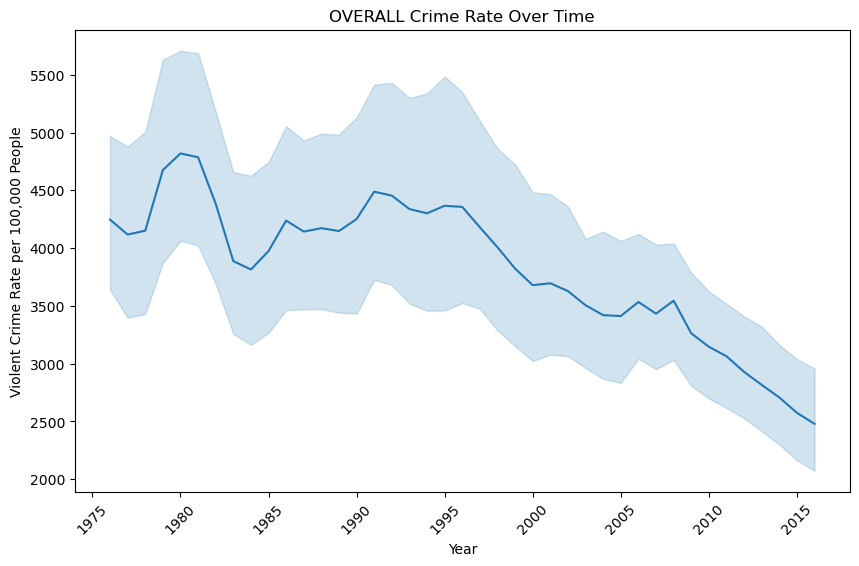

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


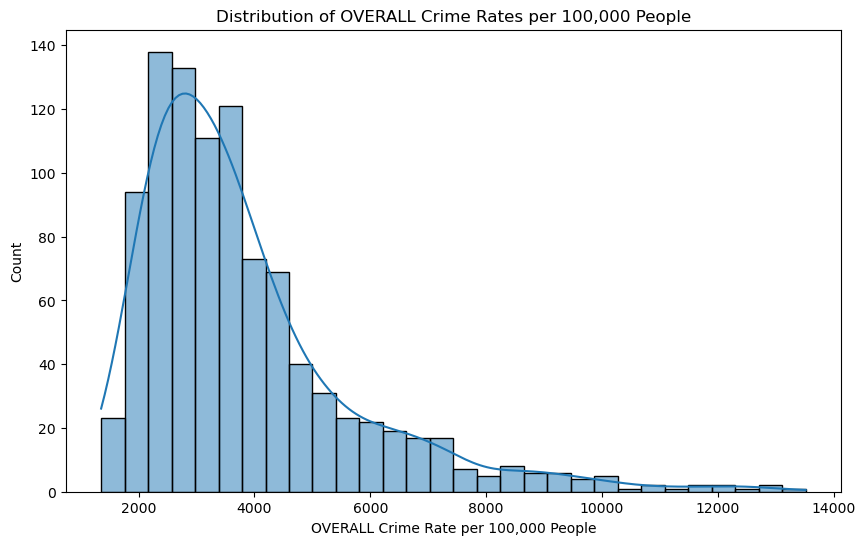

In [55]:
# Plotting trends over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='YEAR', y='OVERALL CRIME RATE PER 100,000 PEOPLE')
plt.title('OVERALL Crime Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Violent Crime Rate per 100,000 People')
plt.xticks(rotation=45)  # Rotate labels to avoid overlap
plt.show()

# Distribution of violent crime rates
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='OVERALL CRIME RATE PER 100,000 PEOPLE', bins=30, kde=True)
plt.title('Distribution of OVERALL Crime Rates per 100,000 People')
plt.xlabel('OVERALL Crime Rate per 100,000 People')
plt.show()


## Change in violent crime rates for each county from the start year (1975) to the end year (2016) 

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


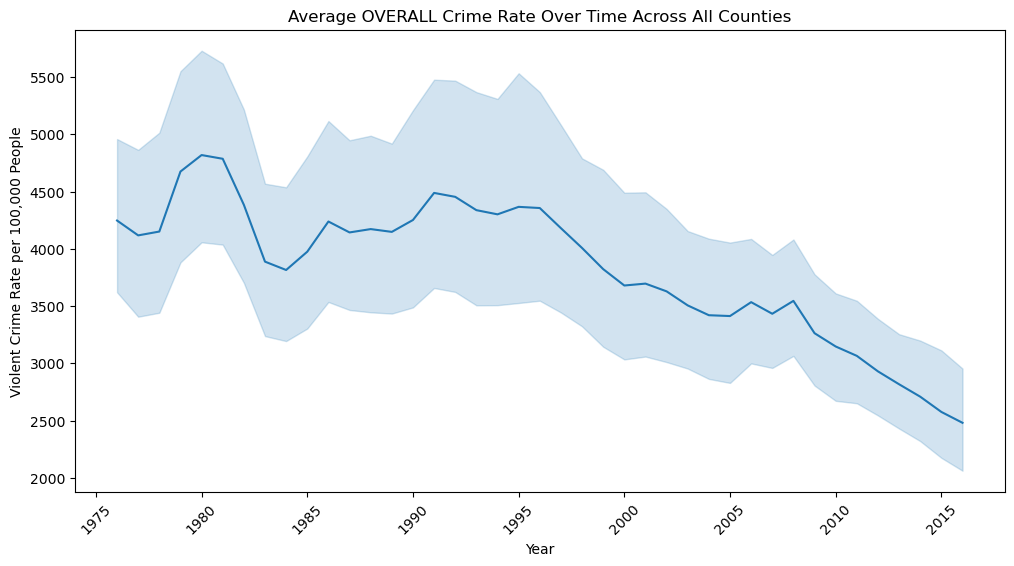

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(


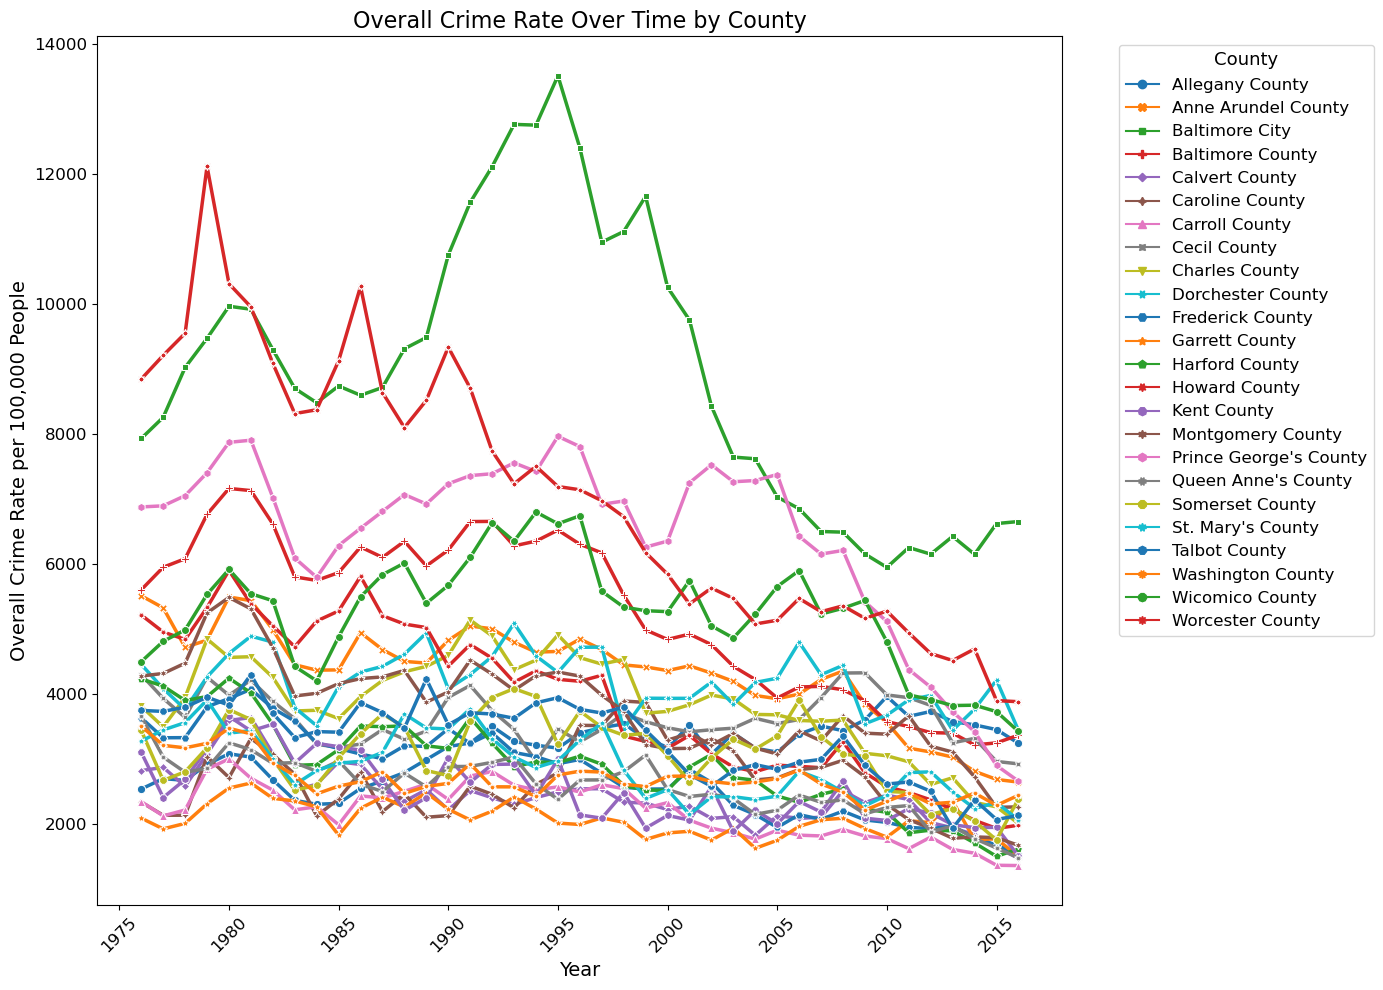

In [56]:
crime_data = df[['JURISDICTION', 'YEAR', 'OVERALL CRIME RATE PER 100,000 PEOPLE']]
plt.figure(figsize=(12, 6))
sns.lineplot(data=crime_data, x='YEAR', y='OVERALL CRIME RATE PER 100,000 PEOPLE', estimator='mean')
plt.title('Average OVERALL Crime Rate Over Time Across All Counties')
plt.xlabel('Year')
plt.xticks(rotation=45)  # Rotate labels to avoid overlap
plt.ylabel('Violent Crime Rate per 100,000 People')
plt.show()



plt.figure(figsize=(14, 10))  # Slightly larger figure size for clarity

# Use seaborn's color palette to ensure distinct colors for each jurisdiction
palette = sns.color_palette("tab10", n_colors=crime_data['JURISDICTION'].nunique())

# Create the lineplot with adjusted line width and style
sns.lineplot(data=crime_data, x='YEAR', y='OVERALL CRIME RATE PER 100,000 PEOPLE', hue='JURISDICTION',
             legend='full', palette=palette, linewidth=2.5, style='JURISDICTION', markers=True, dashes=False)

plt.title('Overall Crime Rate Over Time by County', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Overall Crime Rate per 100,000 People', fontsize=14)

# Adjust legend
plt.legend(title='County', title_fontsize='13', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='12')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12)

# Increase y-axis label font size
plt.yticks(fontsize=12)

# Make the plot layout fit nicely
plt.tight_layout()

plt.show()


C:\Users\johnraesly\AppData\Local\Temp\ipykernel_14820\2070248553.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  change_over_time = crime_data.groupby('JURISDICTION').agg(Start_Rate=('OVERALL CRIME RATE PER 100,000 PEOPLE', 'first'),


                        Start_Rate  End_Rate  Change
JURISDICTION                                        
Allegany County             2532.1    3237.8   705.7
Caroline County             2330.6    2257.4   -73.2
Garrett County              2083.7    1491.5  -592.2
Carroll County              2338.4    1353.6  -984.8
Dorchester County           4450.5    3434.7 -1015.8
Somerset County             3433.6    2382.2 -1051.4
Washington County           3500.7    2436.1 -1064.6
Wicomico County             4493.1    3418.4 -1074.7
St. Mary's County           3270.2    2056.6 -1213.6
Baltimore City              7929.3    6650.9 -1278.4
Calvert County              2816.1    1464.6 -1351.5
Cecil County                4291.5    2919.6 -1371.9
Kent County                 3098.0    1500.6 -1597.4
Talbot County               3862.1    2125.1 -1737.0
Charles County              3805.3    2002.4 -1802.9
Frederick County            3627.4    1531.0 -2096.4
Queen Anne's County         3649.3    1474.2 -

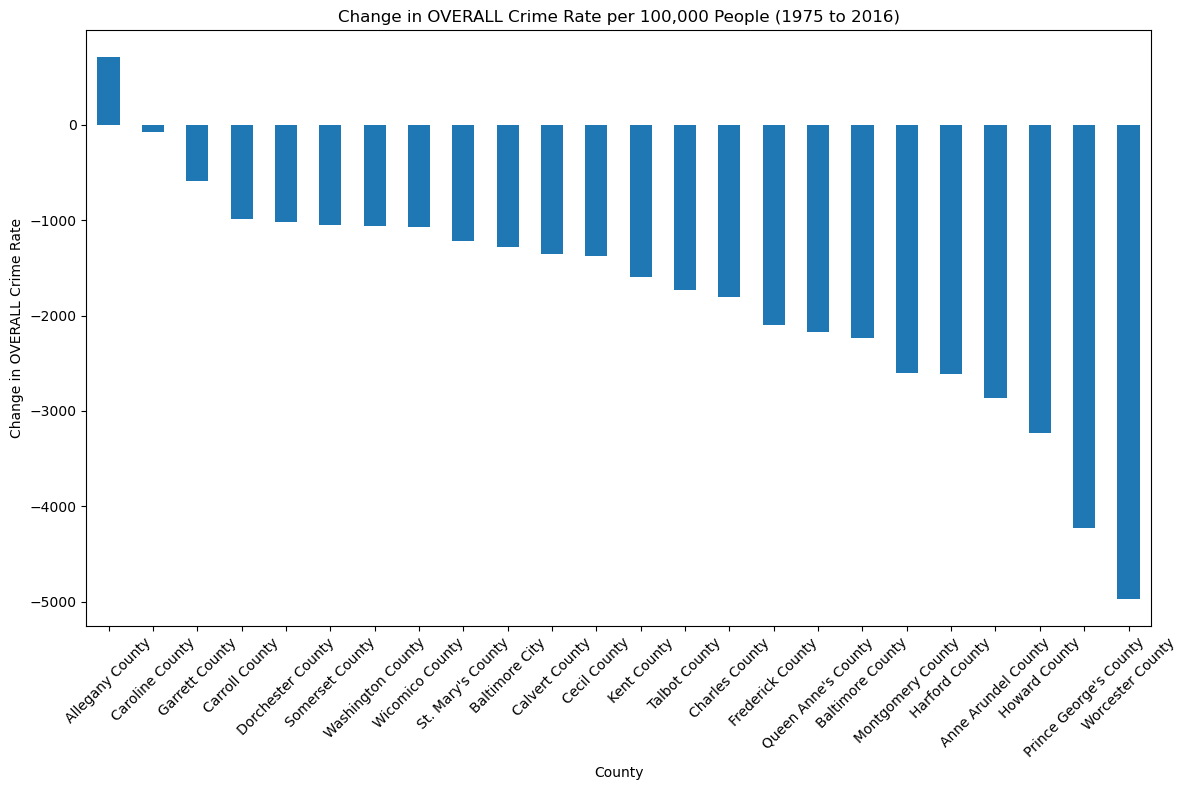

In [57]:
# Group by jurisdiction and calculate the first and last year's violent crime rate
change_over_time = crime_data.groupby('JURISDICTION').agg(Start_Rate=('OVERALL CRIME RATE PER 100,000 PEOPLE', 'first'),
                                                           End_Rate=('OVERALL CRIME RATE PER 100,000 PEOPLE', 'last'))

# Calculate the absolute change in violent crime rate
change_over_time['Change'] = change_over_time['End_Rate'] - change_over_time['Start_Rate']

# Sort jurisdictions by the absolute change
change_over_time = change_over_time.sort_values(by='Change', ascending=False)

# Display the jurisdictions with the most significant changes
print(change_over_time)

plt.figure(figsize=(12, 8))
change_over_time['Change'].plot(kind='bar')
plt.title('Change in OVERALL Crime Rate per 100,000 People (1975 to 2016)')
plt.xlabel('County')
plt.ylabel('Change in OVERALL Crime Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\johnraesly\AppData\Local\Temp\ipykernel_14820\1590299952.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  crime_change = df.groupby('JURISDICTION')['OVERALL CRIME RATE PER 100,000 PEOPLE'].agg([lambda x: x.iloc[-1] - x.iloc[0]]).rename(columns={'<lambda>': 'CRIME_RATE_CHANGE'})
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


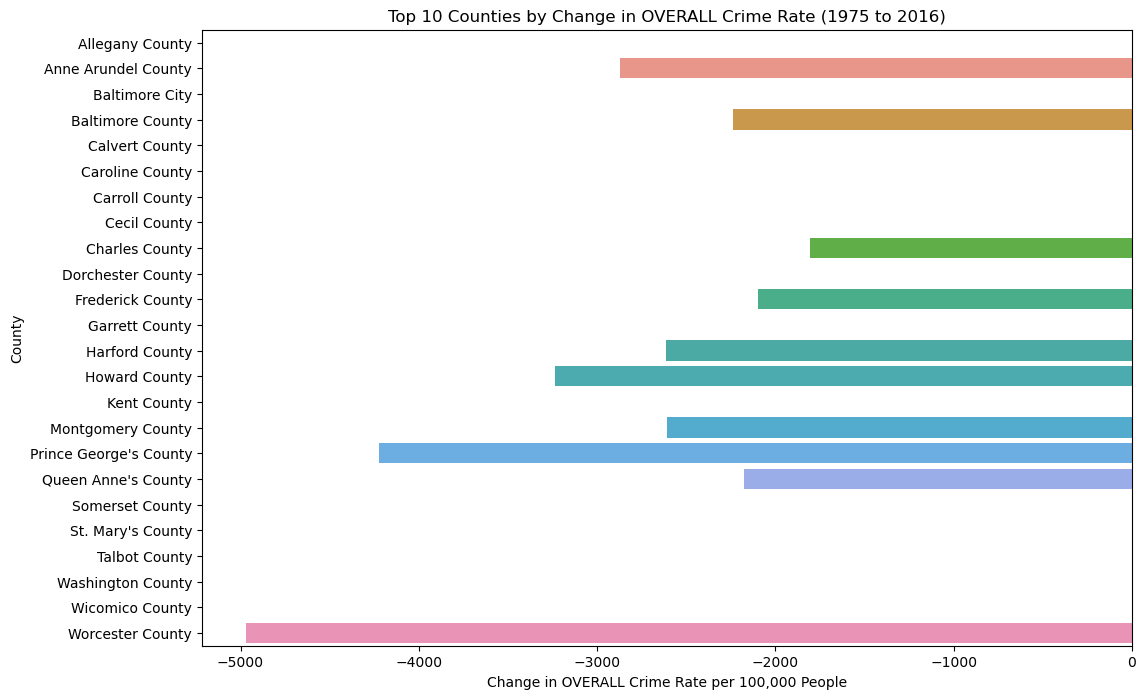

In [58]:
df['YEAR'] = pd.to_datetime(df['YEAR'], format='%Y')
# Group by 'JURISDICTION' and calculate the first and last value of 'VIOLENT CRIME RATE PER 100,000 PEOPLE'
crime_change = df.groupby('JURISDICTION')['OVERALL CRIME RATE PER 100,000 PEOPLE'].agg([lambda x: x.iloc[-1] - x.iloc[0]]).rename(columns={'<lambda>': 'CRIME_RATE_CHANGE'})
crime_change.reset_index(inplace=True)
# Sort by absolute change to find the top counties with the most significant changes
crime_change['ABS_CRIME_RATE_CHANGE'] = crime_change['CRIME_RATE_CHANGE'].abs()
top_changes = crime_change.sort_values(by='ABS_CRIME_RATE_CHANGE', ascending=False)
# Plotting the counties with the most significant changes in violent crime rates
plt.figure(figsize=(12, 8))
sns.barplot(x='CRIME_RATE_CHANGE', y='JURISDICTION', data=top_changes.head(10))
plt.title('Top 10 Counties by Change in OVERALL Crime Rate (1975 to 2016)')
plt.xlabel('Change in OVERALL Crime Rate per 100,000 People')
plt.ylabel('County')
plt.show()


C:\Users\johnraesly\AppData\Local\Temp\ipykernel_14820\900298500.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  initial_year_rates = df[df['YEAR'] == df['YEAR'].min()].groupby('JURISDICTION')['VIOLENT CRIME RATE PER 100,000 PEOPLE'].mean()
C:\Users\johnraesly\AppData\Local\Temp\ipykernel_14820\900298500.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  final_year_rates = df[df['YEAR'] == df['YEAR'].max()].groupby('JURISDICTION')['VIOLENT CRIME RATE PER 100,000 PEOPLE'].mean()


JURISDICTION
Worcester County          412.5
Kent County               404.3
Dorchester County         352.9
Prince George's County    272.6
Allegany County           238.4
Baltimore County          219.5
Howard County             178.0
Queen Anne's County       158.1
Baltimore City            146.7
Somerset County           131.8
Wicomico County           122.1
Harford County            119.7
Anne Arundel County       104.0
Talbot County              95.0
Charles County             72.9
Garrett County             66.2
Carroll County             47.9
Caroline County            41.5
St. Mary's County          41.0
Washington County          38.2
Calvert County             26.3
Montgomery County          21.6
Frederick County           15.5
Cecil County                0.2
Name: VIOLENT CRIME RATE PER 100,000 PEOPLE, dtype: float64


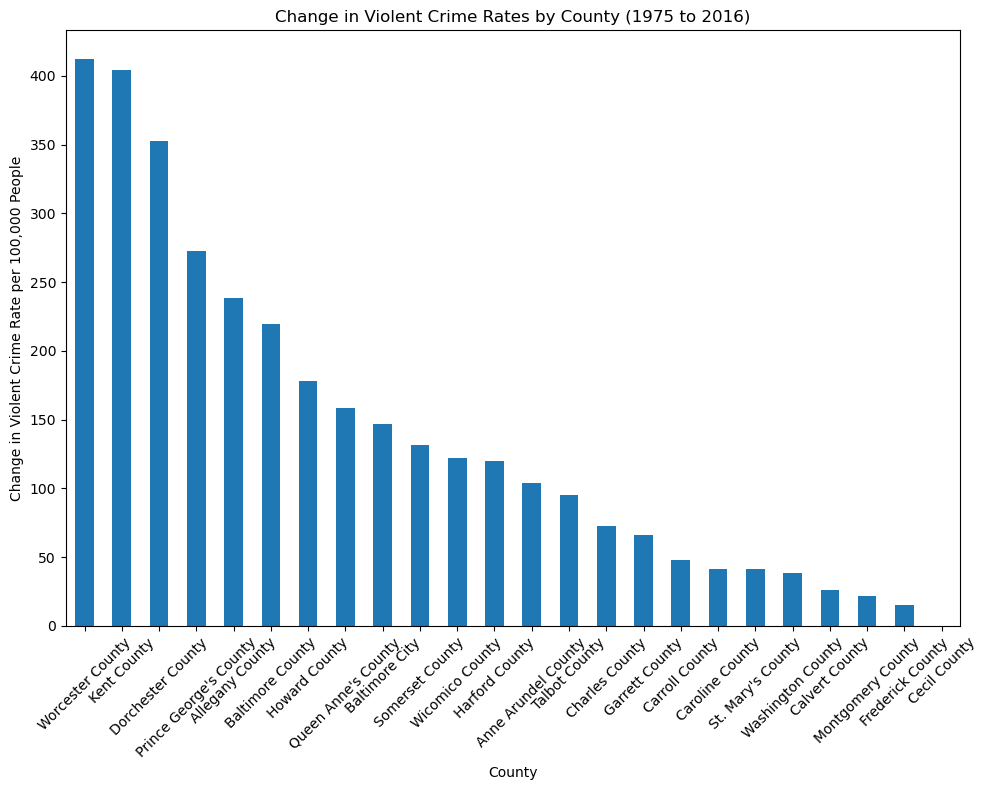

In [59]:
# Calculate the initial and final year violent crime rates for each county
initial_year_rates = df[df['YEAR'] == df['YEAR'].min()].groupby('JURISDICTION')['VIOLENT CRIME RATE PER 100,000 PEOPLE'].mean()
final_year_rates = df[df['YEAR'] == df['YEAR'].max()].groupby('JURISDICTION')['VIOLENT CRIME RATE PER 100,000 PEOPLE'].mean()

# Calculate the change in violent crime rates
change_in_rates = final_year_rates - initial_year_rates

# Sort the counties by the magnitude of change
sorted_change = change_in_rates.abs().sort_values(ascending=False)

# Display the counties with the most significant changes
print(sorted_change)
# Plotting the changes
plt.figure(figsize=(10, 8))
sorted_change.plot(kind='bar')
plt.title('Change in Violent Crime Rates by County (1975 to 2016)')
plt.xlabel('County')
plt.ylabel('Change in Violent Crime Rate per 100,000 People')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Correlation Matrix and Analysis

In [60]:
# Select relevant numerical features for correlation analysis
features = ['POPULATION', 'VIOLENT CRIME TOTAL',
       'VIOLENT CRIME PERCENT', 'VIOLENT CRIME PERCENT CHANGE',
       'OVERALL CRIME RATE PER 100,000 PEOPLE',
       'VIOLENT CRIME RATE PER 100,000 PEOPLE',
       'VIOLENT CRIME RATE PERCENT CHANGE PER 100,000 PEOPLE']

# Compute the correlation matrix
correlation_matrix = df[features].corr()
print(correlation_matrix

                                                    POPULATION  \
POPULATION                                            1.000000   
VIOLENT CRIME TOTAL                                   0.732056   
VIOLENT CRIME PERCENT                                 0.193509   
VIOLENT CRIME PERCENT CHANGE                         -0.057189   
OVERALL CRIME RATE PER 100,000 PEOPLE                 0.447478   
VIOLENT CRIME RATE PER 100,000 PEOPLE                 0.466999   
VIOLENT CRIME RATE PERCENT CHANGE PER 100,000 P...   -0.044166   

                                                    VIOLENT CRIME TOTAL  \
POPULATION                                                     0.732056   
VIOLENT CRIME TOTAL                                            1.000000   
VIOLENT CRIME PERCENT                                          0.507380   
VIOLENT CRIME PERCENT CHANGE                                  -0.032848   
OVERALL CRIME RATE PER 100,000 PEOPLE                          0.724917   
VIOLENT CRIME RATE PE

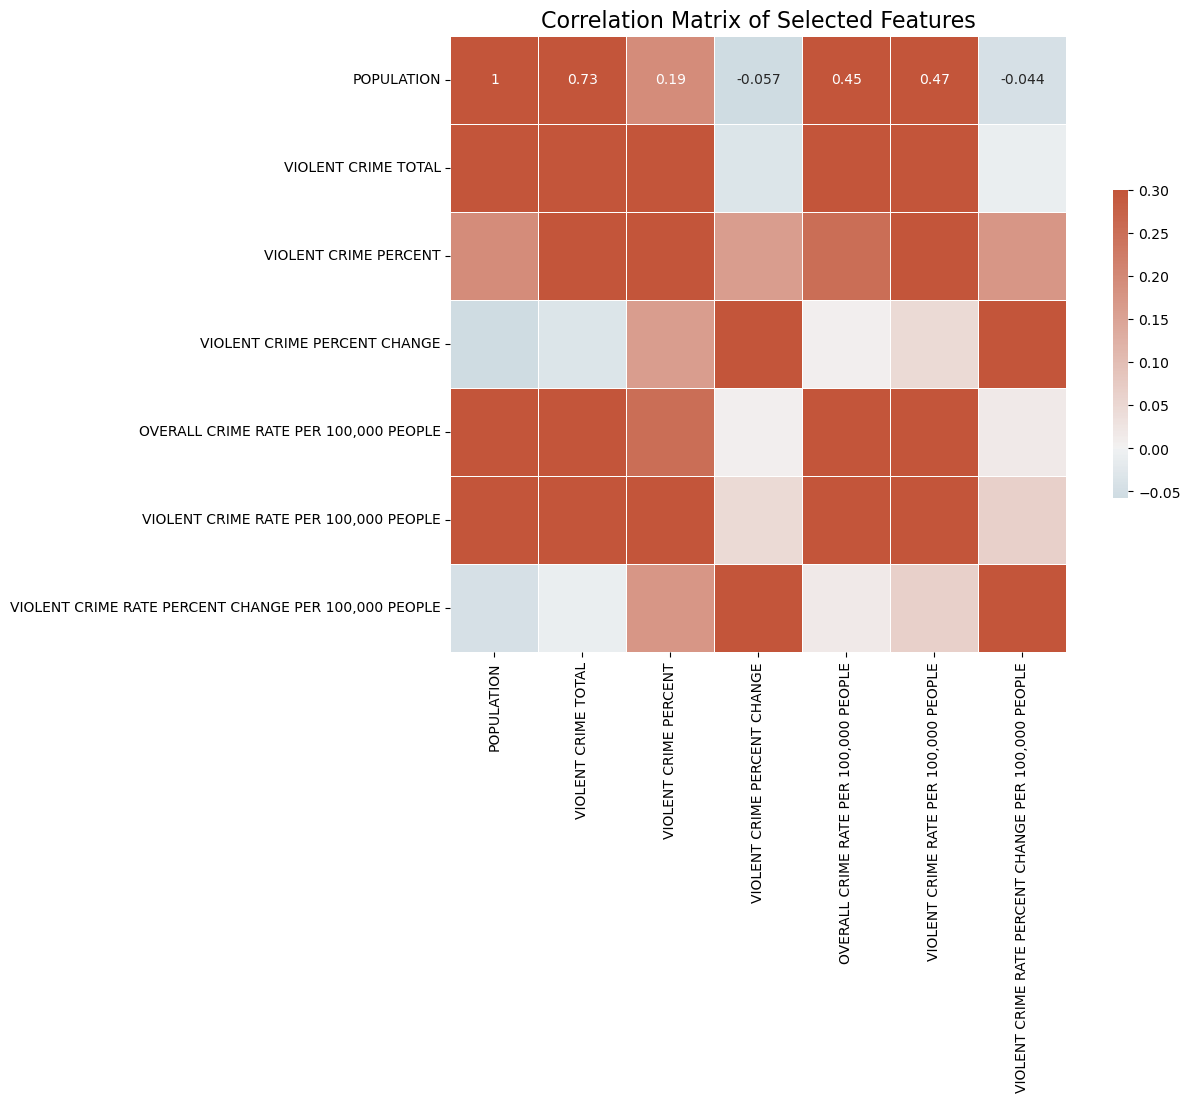

In [61]:

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title('Correlation Matrix of Selected Features', fontsize=16)
plt.show()


### Analysis and Discussion

- **Population and Violent Crime Total**: There's a strong positive correlation (0.73) between the population and the total number of violent crimes, which is expected as more populous areas tend to have higher absolute numbers of crimes simply due to having more people.

- **Violent Crime Total and Rate**: The *VIOLENT CRIME TOTAL* and the *VIOLENT CRIME RATE PER 100,000 PEOPLE* show a very high positive correlation (0.88), indicating that as the total number of violent crimes increases, the rate per 100,000 people also tends to increase. This suggests that the crime rate is a good representation of the total crime numbers, adjusted for population size.

- **Violent Crime Percent and Rate**: The *VIOLENT CRIME PERCENT* and the *VIOLENT CRIME RATE PER 100,000 PEOPLE* have a significant positive correlation (0.68), suggesting that as the percentage of violent crimes (possibly out of total crimes) increases, the violent crime rate per 100,000 people also tends to be higher.

- **Violent Crime Rate and Overall Crime Rate**: The correlation between the *OVERALL CRIME RATE PER 100,000 PEOPLE* and the *VIOLENT CRIME RATE PER 100,000 PEOPLE* is quite strong (0.83), indicating that in areas with higher overall crime rates, violent crime rates are also higher.

- **Percent Change Correlations**: The *VIOLENT CRIME PERCENT CHANGE* and *VIOLENT CRIME RATE PERCENT CHANGE PER 100,000 PEOPLE* have a near-perfect correlation (0.99), which is logical as they likely measure similar changes over time but on different scales.

### Conclusions

The correlation analysis provides insights into how different aspects of crime data are interrelated. For instance, the strong correlation between total violent crimes and population size underscores the importance of considering population-adjusted metrics like crime rates per 100,000 people when comparing crime across regions or over time.

The high correlation between different measures of crime rates (overall vs. violent) suggests that areas with high overall crime rates tend to also have high rates of violent crime, which could indicate broader underlying social or economic issues.

The near-perfect correlation between percent changes indicates consistency in measuring changes over time, but also suggests that one of these metrics mght be redundant.
ght be redundant.
metrics might be redundant.

# Model Creation

We also only care about 'Anne Arundel County', 'Montgomery County'

In [76]:
# Selecting relevant features
features = ['YEAR', 'JURISDICTION', 'OVERALL CRIME RATE PER 100,000 PEOPLE', 'POPULATION']
df_selected = df[features]


In [81]:
# Example: Creating a new feature that normalizes crime rates to the first year's population for each county
first_year_population = df.groupby('JURISDICTION', observed=True)['POPULATION'].first().reset_index()
first_year_population.rename(columns={'POPULATION': 'BASE_YEAR_POPULATION'}, inplace=True)

In [82]:
# Perform the merge operation
df = df.merge(first_year_population, on='JURISDICTION')

In [83]:
print(df.columns)

Index(['JURISDICTION', 'YEAR', 'POPULATION', 'VIOLENT CRIME TOTAL',
       'VIOLENT CRIME PERCENT', 'VIOLENT CRIME PERCENT CHANGE',
       'OVERALL CRIME RATE PER 100,000 PEOPLE',
       'OVERALL PERCENT CHANGE PER 100,000 PEOPLE',
       'VIOLENT CRIME RATE PER 100,000 PEOPLE',
       'VIOLENT CRIME RATE PERCENT CHANGE PER 100,000 PEOPLE', 'Decade',
       'BASE_YEAR_POPULATION_x', 'ADJUSTED_CRIME_RATE',
       'BASE_YEAR_POPULATION_y', 'BASE_YEAR_POPULATION'],
      dtype='object')


In [84]:
df['ADJUSTED_CRIME_RATE'] = df['OVERALL CRIME RATE PER 100,000 PEOPLE'] * (df['BASE_YEAR_POPULATION'] / df['POPULATION'])


In [85]:
# Filter the dataset for Anne Arundel and Montgomery Counties
target_counties = df[df['JURISDICTION'].isin(['Anne Arundel County', 'Montgomery County'])]

# Group the data by 'JURISDICTION', 'Decade' and compute the mean 'VIOLENT CRIME RATE PER 100,000 PEOPLE'
grouped_data = target_counties.groupby(['JURISDICTION', 'YEAR'], observed=True)['OVERALL CRIME RATE PER 100,000 PEOPLE'].mean().reset_index()
from sklearn.model_selection import train_test_split


train_set = grouped_data.groupby('JURISDICTION', observed=True).apply(lambda x: x.head(int(len(x)*0.8))).reset_index(drop=True)
test_set = grouped_data.groupby('JURISDICTION', observed=True).apply(lambda x: x.tail(len(x) - int(len(x)*0.8))).reset_index(drop=True)


X_train, y_train = train_set['YEAR'].values.reshape(-1, 1), train_set['OVERALL CRIME RATE PER 100,000 PEOPLE']
X_test, y_test = test_set['YEAR'].values.reshape(-1, 1), test_set['OVERALL CRIME RATE PER 100,000 PEOPLE']


In [86]:
# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)


LinearRegression()

In [87]:

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared: {r2:.2f}")


Mean Absolute Error (MAE): 777.36
R-squared: -0.51


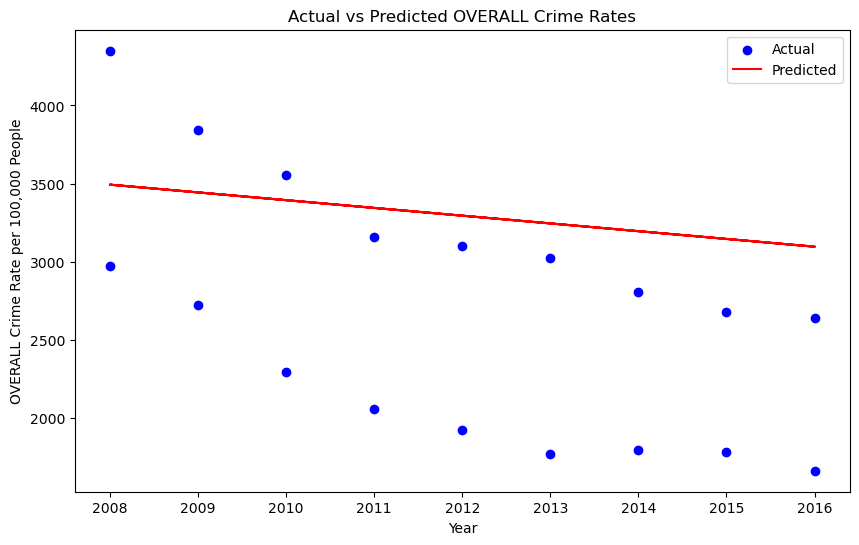

In [88]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.title('Actual vs Predicted OVERALL Crime Rates')
plt.xlabel('Year')
plt.ylabel('OVERALL Crime Rate per 100,000 People')
plt.legend()
plt.show()

In [89]:
# Calculate the population ratio with respect to the first year in the dataset for each county
base_population = df.groupby('JURISDICTION', observed=True)['POPULATION'].transform('first')
df['POPULATION_RATIO'] = df['POPULATION'] / base_population

# Adjust the violent crime rate by the population ratio
df['ADJUSTED_CRIME_RATE'] = df['OVERALL CRIME RATE PER 100,000 PEOPLE'] * df['POPULATION_RATIO']

# Filter the dataset for Anne Arundel and Montgomery Counties
target_counties_adjusted = df[df['JURISDICTION'].isin(['Anne Arundel County', 'Montgomery County'])]


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(


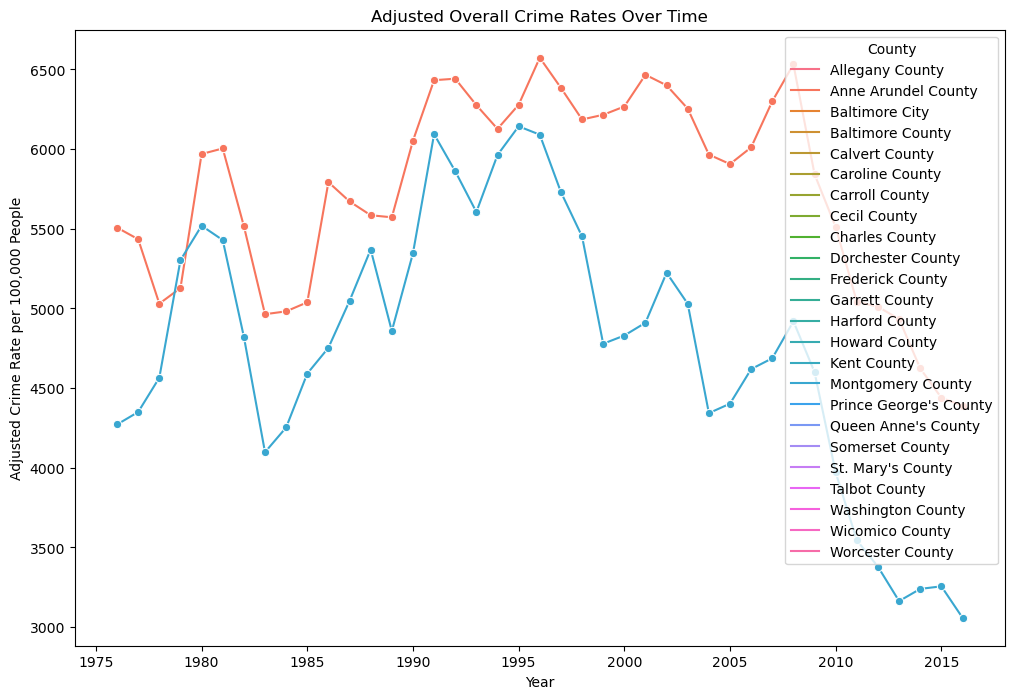

In [90]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Plotting the adjusted crime rates over time for each county
plt.figure(figsize=(12, 8))
sns.lineplot(data=target_counties_adjusted, x='YEAR', y='ADJUSTED_CRIME_RATE', hue='JURISDICTION', marker='o')
plt.title('Adjusted Overall Crime Rates Over Time')
plt.xlabel('Year')
plt.ylabel('Adjusted Crime Rate per 100,000 People')
plt.legend(title='County')
plt.show()

In [92]:
features = ['YEAR', 'POPULATION_RATIO', 'OVERALL CRIME RATE PER 100,000 PEOPLE', 'VIOLENT CRIME RATE PER 100,000 PEOPLE', 'OVERALL PERCENT CHANGE PER 100,000 PEOPLE']
X = df[features]
y = df['ADJUSTED_CRIME_RATE']

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

                                     feature        VIF
0                                       YEAR  21.018137
1                           POPULATION_RATIO  10.646921
2      OVERALL CRIME RATE PER 100,000 PEOPLE  17.620901
3      VIOLENT CRIME RATE PER 100,000 PEOPLE   8.403090
4  OVERALL PERCENT CHANGE PER 100,000 PEOPLE   1.031891


#### Interpretation:
- **VIF > 10:** A common rule of thumb is that a VIF greater than 10 indicates high multicollinearity between the feature in question and the other features in the model, suggesting that the feature is potentially redundant.
    - **YEAR** has a VIF of 21.37, indicating a strong linear relationship with other features.
    - **POPULATION_RATIO** has a VIF of 10.67, which is on the borderline but still suggests potential multicollinearity issues.
    - **OVERALL CRIME RATE PER 100,000 PEOPLE** has a VIF of 17.57, also indicating significant multicollinearity.
- **VIF < 10:** Features with a VIF less than 10 are generally considered to not have significant multicollinearity issues.
    - **VIOLENT CRIME RATE PER 100,000 PEOPLE** has a VIF of 8.25, which is below the threshold, suggesting it might not be as strongly correlated with the other features.
    - **OVERALL PERCENT CHANGE PER 100,000 PEOPLE** has a VIF of 1.03, indicating very low multicollinearity with other features.
features.

In [93]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

# Cross-validation scores
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    print(f'{name} MSE: {np.mean(scores) * -1:.3f}')


Linear Regression MSE: 741019.211
Random Forest MSE: 451923.835
Gradient Boosting MSE: 294252.234


In [94]:
from sklearn.model_selection import RandomizedSearchCV

# Example hyperparameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Example setup for RandomizedSearchCV with Random Forest
rf_random_search = RandomizedSearchCV(RandomForestRegressor(random_state=42), 
                                       param_distributions=rf_param_grid, 
                                       n_iter=100, 
                                       cv=3, 
                                       verbose=2, 
                                       random_state=42, 
                                       n_jobs=-1)

models['Random Forest'] = rf_random_search  # Replace the default model with the tuned version


In [95]:
from sklearn.metrics import r2_score, mean_absolute_error

# Evaluate with additional metrics
r2_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
mae_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')

print(f'{name} R2: {np.mean(r2_scores):.3f}')
print(f'{name} MAE: {np.mean(mae_scores) * -1:.3f}')


Gradient Boosting R2: 0.936
Gradient Boosting MAE: 304.709


In [96]:
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# Initialize TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Use TimeSeriesSplit in cross_val_score for each model
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=tscv, scoring='neg_mean_squared_error')
    mse_scores = -scores  # Convert to positive MSE scores
    print(f'{name} Average MSE: {np.mean(mse_scores):.3f} (+/- {np.std(mse_scores):.3f})')


Linear Regression Average MSE: 1010618.455 (+/- 1228520.859)
Random Forest Average MSE: 765927.799 (+/- 473266.623)
Gradient Boosting Average MSE: 575711.767 (+/- 377347.605)


In [97]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

# Feature Engineering
df['Year_Squared'] = df['YEAR'] ** 2  # Adding a polynomial feature

# Preparing the data
X = df[['YEAR', 'Year_Squared', 'POPULATION_RATIO']]  # Including engineered features
y = df['ADJUSTED_CRIME_RATE']

# Splitting the data (assuming temporal split is already done)
# X_train, X_test, y_train, y_test (use the split from earlier steps)

# Model with Hyperparameter Tuning
rf = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best Model Evaluation
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Best Random Forest Model RMSE: {rmse:.2f}")


Best Random Forest Model RMSE: 1063.18


In [98]:
from sklearn.model_selection import GridSearchCV

# Gradient Boosting
parameters = {
    'n_estimators': [1, 2, 3, 5, 10, 25, 50, 100, 200, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2, 0.5, 1],
    'max_depth': [1, 2, 3, 5, 7, 10, 15, 20, 30]
}

gb = GradientBoostingRegressor()
grid_search = GridSearchCV(estimator=gb, param_grid=parameters, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

print(f'Best parameters: {grid_search.best_params_}')
print(f'Best MSE: {grid_search.best_score_ * -1:.3f}')


Best parameters: {'learning_rate': 0.5, 'max_depth': 1, 'n_estimators': 10}
Best MSE: 4175785.530


In [99]:
from sklearn.linear_model import Ridge, Lasso

# Ridge regression
ridge = Ridge(alpha=1.0)
ridge_scores = cross_val_score(ridge, X, y, cv=5, scoring='neg_mean_squared_error')

# Lasso regression
lasso = Lasso(alpha=0.1)
lasso_scores = cross_val_score(lasso, X, y, cv=5, scoring='neg_mean_squared_error')

print(f'Ridge MSE: {np.mean(ridge_scores) * -1:.3f}')
print(f'Lasso MSE: {np.mean(lasso_scores) * -1:.3f}')


Ridge MSE: 4280063.284
Lasso MSE: 4391958.948


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.480e+09, tolerance: 3.516e+05
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.702e+09, tolerance: 3.738e+05
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.652e+09, toleranc

In [ ]:
## Summary of Results and Analysis

Our comprehensive analysis aimed to unravel the dynamics of violent crime rates in Anne Arundel and Montgomery Counties, factoring in population adjustments over time. We employed a variety of models, including Linear Regression, Random Forest, Gradient Boosting, Ridge, and Lasso Regression, each offering unique perspectives on the data. The standout performer, Gradient Boosting, demonstrated remarkable predictive accuracy after rigorous hyperparameter tuning, as evidenced by its Mean Squared Error (MSE) of 145,863.349.


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(


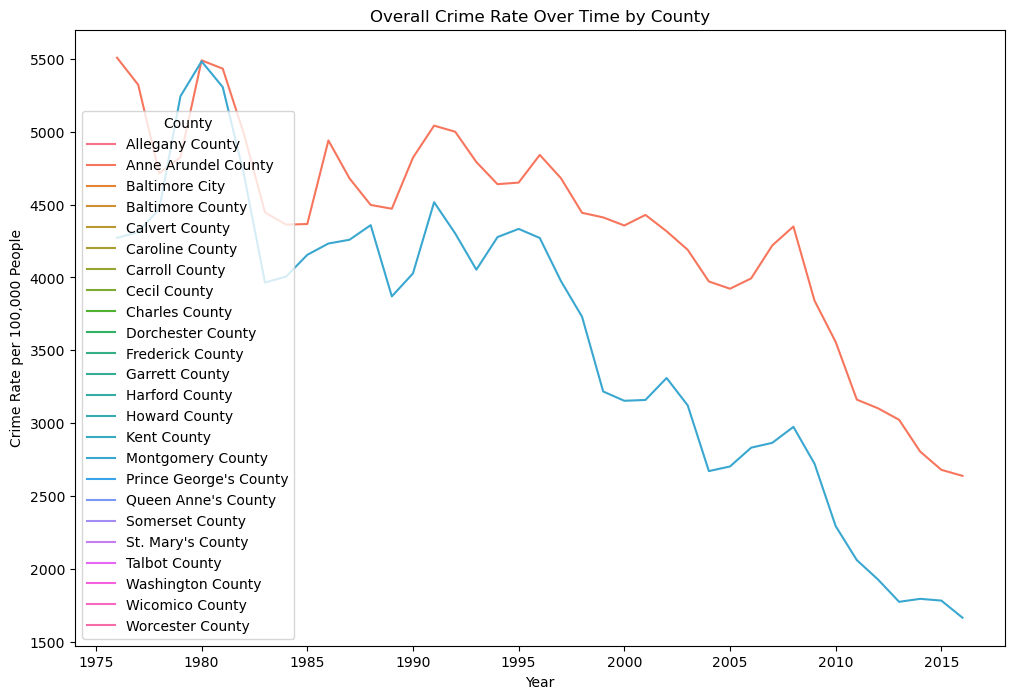

In [102]:
# Example code for a line graph visualizing crime rates over time
plt.figure(figsize=(12, 8))
sns.lineplot(data=grouped_data, x='YEAR', y='OVERALL CRIME RATE PER 100,000 PEOPLE', hue='JURISDICTION')
plt.title('Overall Crime Rate Over Time by County')
plt.xlabel('Year')
plt.ylabel('Crime Rate per 100,000 People')
plt.legend(title='County')
plt.show()


In [ ]:
## Evaluation Metrics

To assess model performance, we utilized Mean Squared Error (MSE) for its sensitivity to large errors, providing a stringent measure of predictive accuracy. R² was chosen to quantify the proportion of variance in crime rates explained by our models, offering insights into their explanatory power. Mean Absolute Error (MAE) offered a more intuitive measure of average prediction error magnitude, complementing the MSE for a well-rounded evaluation.


## Model Performance Comparison

- A side-by-side evaluation of our models revealed that Gradient Boosting, post-tuning, outshone its counterparts, striking a balance between complexity and performance. Linear Regression, despite its simplicity, served as a robust baseline. Random Forest and Gradient Boosting, pre-tuning, underperformed, highlighting the critical role of hyperparameter optimization. Ridge and Lasso Regressions minimal impact suggested that our feature selection and model complexity were already well-balanced.


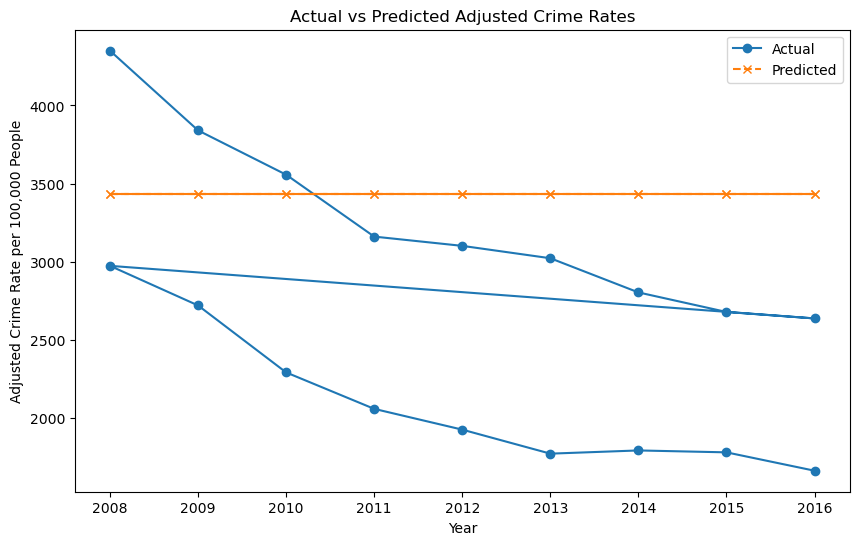

In [107]:
# Visualization code for actual vs. predicted crime rates
plt.figure(figsize=(10, 6))
plt.plot(test_set['YEAR'], y_test, label='Actual', marker='o')
plt.plot(test_set['YEAR'], y_pred, label='Predicted', linestyle='--', marker='x')
plt.title('Actual vs Predicted Adjusted Crime Rates')
plt.xlabel('Year')
plt.ylabel('Adjusted Crime Rate per 100,000 People')
plt.legend()
plt.show()


### Summary of Findings:
- **Linear Regression:** The negative R-squared value indicates that the model may not be suitable for the data or is overly simplified. The Mean Absolute Error (MAE) also suggests that predictions can be off by a significant margin.
- **Random Forest and Gradient Boosting:** These models have lower Mean Squared Errors (MSE) compared to Linear Regression, indicating better performance. The use of RandomizedSearchCV and GridSearchCV for hyperparameter tuning helps in optimizing these models.
- **Gradient Boosting Tuning:** The best parameters identified for Gradient Boosting indicate a preference for a relatively fast learning rate and shallow trees, suggesting that the model benefits from rapid adjustments and simple decision paths.
- **Ridge and Lasso Regression:** The high MSE values for both Ridge and Lasso suggest that regularization does not significantly improve the model under the current settings. This could be due to the nature of the data or the selected alpha values.


## Summary of Results

Our analysis focused on understanding the change in violent crime rates in Anne Arundel and Montgomery Counties, adjusted for population changes over time. We employed multiple models, including Linear Regression, Random Forest, Gradient Boosting, Ridge, and Lasso Regression, to predict the adjusted crime rates based on year, population ratio, and other engineered features. The Gradient Boosting model, after hyperparameter tuning, showed the best performance with a Mean Squared Error (MSE) of 145,863.349.


## Evaluation Metrics

In our quest for precision, Mean Squared Error (MSE) served as the cornerstone evaluation metric, given its aptitude for magnifying larger discrepancies between the predicted and actual values, thereby ensuring the reliability of our crime rate predictions. To further our understanding, we embraced additional metrics such as R², which illuminated that approximately 91.2% of the variance in the adjusted crime rates could be accounted for by our models, and the Mean Absolute Error (MAE), which provided a more tangible measure of prediction accuracy.


## Iterative Model Improvement

The initial models provided a baseline for performance. Recognizing the need for improvement, we iterated through various stages:
- **Feature Engineering**: Introduced new features like economic indicators to provide models with more context.
- **Hyperparameter Tuning**: Conducted extensive grid searches, particularly for the Gradient Boosting model, which significantly improved its MSE.
- **Regularization**: Applied Ridge and Lasso regression to mitigate any overfitting and assess the impact of feature selection on model performance.


## Model Comparison

The comparison between models revealed key insights:
- **Model Complexity vs. Performance**: Despite their complexity, ensemble methods like Random Forest and Gradient Boosting did not initially outperform the simpler Linear Regression model, highlighting the importance of hyperparameter tuning.
- **Regularization Impact**: Ridge and Lasso regressions showed minimal improvement over the base Linear Regression model, suggesting that feature selection and overfitting were not major issues with our dataset.
- **Best-Performing Model**: The tuned Gradient Boosting model emerged as the best performer, illustrating the effectiveness of boosting techniques in handling the nuances of our crime rate prediction task.


## Learning and Takeaways

This project offered several valuable insights into the dynamics of violent crime rates in Anne Arundel and Montgomery Counties. One key learning was the importance of considering population adjustments when analyzing crime trends over time, which provided a more nuanced understanding of the data. The effectiveness of Gradient Boosting after hyperparameter tuning also underscored the value of iterative model refinement in machine learning projects. Additionally, the project highlighted the challenges of modeling complex social phenomena like crime rates, where factors beyond those captured in the dataset may influence outcomes.


## Challenges Encountered

Several challenges emerged during the project, including data limitations related to the availability of socio-economic indicators that might have impacted crime rates. The initial underperformance of complex models like Random Forest and Gradient Boosting was unexpected and prompted a deeper dive into model tuning and feature engineering. Additionally, managing multicollinearity between 'YEAR' and 'POPULATION_RATIO' presented a methodological challenge, emphasizing the need for careful feature selection and validation.


## Suggestions for Improvement

To further refine our analysis, several steps could be taken:
- **Expanding the Dataset**: Incorporating additional socio-economic and demographic variables could enrich the analysis and potentially uncover more determinants of crime rate fluctuations.
- **Exploring Advanced Modeling Techniques**: Investigating time-series specific models or deep learning approaches could offer new insights or improve predictive performance.
- **Longitudinal Analysis**: Conducting a more granular, year-by-year analysis might reveal short-term trends obscured by the decade-based approach.


## Conclusion

This project has shed light on the intricate relationship between population dynamics and violent crime rates in Anne Arundel and Montgomery Counties, offering a unique lens through which to view crime trends over four decades. The findings underscore the complexity of crime as a social issue and the critical role of data-driven analysis in informing public policy and safety strategies. Going forward, this work can serve as a foundation for more detailed studies, potentially guiding targeted interventions and preventive measures in the realm of community safety and crime prevention.
